In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import FinanceDataReader as fdr
import matplotlib

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (16,8)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [3]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-05-09,1210,1225,1210,1216,64040,NaN
1998-05-11,1215,1221,1191,1192,195520,-0.019737
1998-05-12,1182,1200,1156,1177,243650,-0.012584
1998-05-13,1163,1219,1148,1205,359030,0.023789
1998-05-14,1202,1288,1191,1221,308030,0.013278
...,...,...,...,...,...,...
2022-07-07,56400,58700,56300,58200,21322833,0.031915
2022-07-08,58600,59300,58200,58700,15339271,0.008591
2022-07-11,59300,59600,58700,58800,13042624,0.001704


In [5]:
#data 형식변경(test)
df.index = df.index.strftime('%Y/%m/%d') 

AttributeError: 'Index' object has no attribute 'strftime'

In [7]:
# data 형식변경 확인 (test)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998/05/09,1210,1225,1210,1216,64040,NaN
1998/05/11,1215,1221,1191,1192,195520,-0.019737
1998/05/12,1182,1200,1156,1177,243650,-0.012584
1998/05/13,1163,1219,1148,1205,359030,0.023789
1998/05/14,1202,1288,1191,1221,308030,0.013278
...,...,...,...,...,...,...
2022/07/07,56400,58700,56300,58200,21322833,0.031915
2022/07/08,58600,59300,58200,58700,15339271,0.008591
2022/07/11,59300,59600,58700,58800,13042624,0.001704


In [89]:
# df = fdr.DataReader('KS11', '2016-01-04', '2021-12-31')
# df_kr = df.drop(['Low','High','Open'], axis=1)
# df_kr

# df_kr.to_csv("2016_2021코스피.csv")

# df = fdr.DataReader('KQ11', '2016-01-04', '2021-12-31')
# df.drop(['Open'], axis=1)
# df.drop(['High'], axis=1)
# df_na = df.drop(['Low','High','Open'], axis=1)
# df_na

# df_na.to_csv("2016_2021나스닥.csv")


<AxesSubplot:xlabel='Date'>

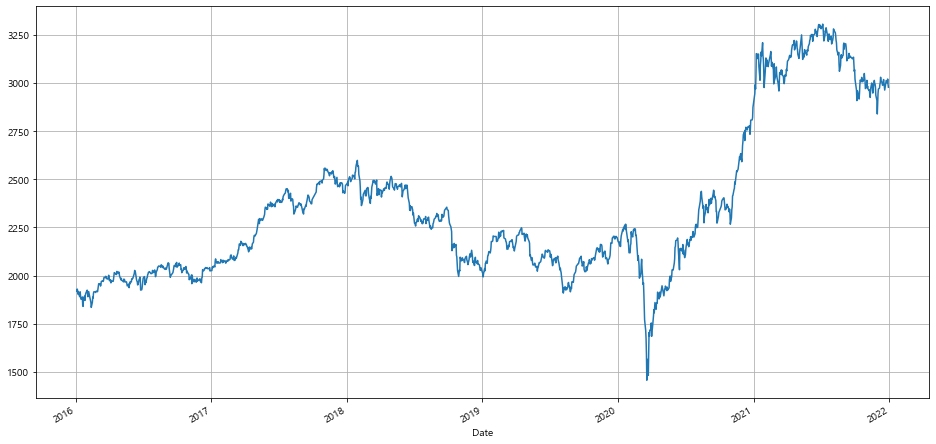

In [12]:
#코스피 5년치 그래프
ks11 = fdr.DataReader('KS11', '2016/01/04', '2021/12/31',data_source='close')
ks11['Close'].plot()

<AxesSubplot:xlabel='Date'>

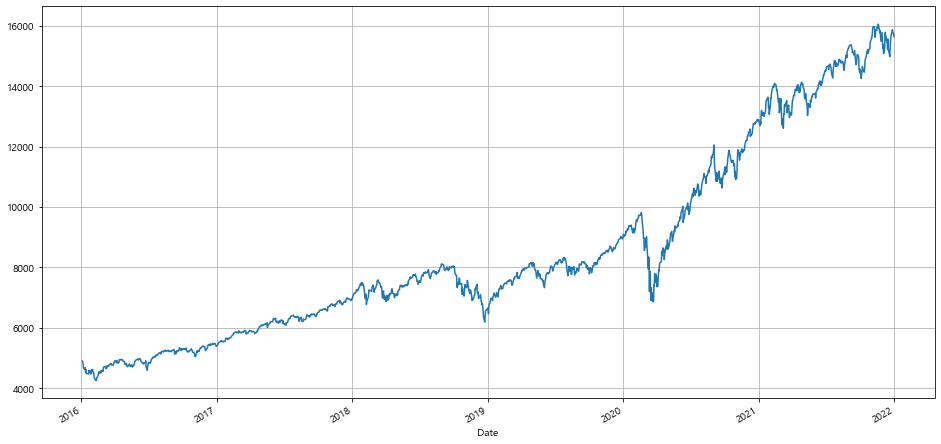

In [13]:
#나스닥 5년치 그래프
IXIC = fdr.DataReader('IXIC', '2016/01/04', '2021/12/31',data_source='close')
IXIC['Close'].plot()

In [63]:
#stock_list = ks11['Close'],IXIC['Close']

In [67]:
# df_list = [fdr.DataReader(code, '2016-01-01', '2021-12-31')['Close'] for name, code in stock_list]
# df_list

In [66]:
# df = pd.concat(df_list, axis=1)
# df.columns = [name for name, code in stock_list] 
# df.head(10)

In [69]:
#df.plot()

In [26]:
#나스닥 결측치제거
IXIC = fdr.DataReader('IXIC', '2016-01-04', '2021-12-31',data_source='close')

IXIC.dropna(axis=0)
IXIC.head(50)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,4903.09,4897.65,4903.09,4846.98,569790000.0,-0.0208
2016-01-05,4891.43,4917.84,4926.73,4872.74,428070000.0,-0.0024
2016-01-06,4835.77,4813.76,4866.04,4804.69,501750000.0,-0.0114
2016-01-07,4689.43,4736.40,4788.02,4688.17,590070000.0,-0.0303
2016-01-08,4643.63,4722.02,4742.57,4637.85,540570000.0,-0.0098
2016-01-11,4637.99,4673.44,4683.02,4573.77,528170000.0,-0.0012
2016-01-12,4685.92,4681.54,4714.80,4618.03,498550000.0,0.0103
2016-01-13,4526.06,4706.02,4713.98,4517.56,570190000.0,-0.0341
2016-01-14,4615.00,4545.37,4650.55,4470.59,593870000.0,0.0197


In [27]:
#코스피 결측치제거
ks11 = fdr.DataReader('ks11', '2016-01-04', '2021-12-31',data_source='close')

ks11.dropna(axis=0)
ks11.head(50)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2016-01-04,1918.76,1954.47,1954.52,1918.76,359020000.0,-0.0217
2016-01-05,1930.53,1911.93,1937.57,1911.93,446550000.0,0.0061
2016-01-06,1925.43,1934.25,1934.25,1911.61,594610000.0,-0.0026
2016-01-07,1904.33,1915.71,1926.41,1901.24,393040000.0,-0.0110
2016-01-08,1917.62,1889.42,1918.25,1883.82,430200000.0,0.0070
2016-01-11,1894.84,1897.18,1907.43,1892.69,328770000.0,-0.0119
2016-01-12,1890.86,1907.61,1910.59,1888.94,295140000.0,-0.0021
2016-01-13,1916.28,1904.33,1921.00,1902.49,265220000.0,0.0134
2016-01-14,1900.01,1893.18,1900.48,1882.02,310980000.0,-0.0085


In [36]:
stock_list = [
  ["나스닥", "IXIC"],
  ["코스피", "ks11"],
]

In [37]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)


2

In [38]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head(50)

,나스닥,코스피
Date,,
2016-01-04,4903.09,1918.76
2016-01-05,4891.43,1930.53
2016-01-06,4835.77,1925.43
2016-01-07,4689.43,1904.33
2016-01-08,4643.63,1917.62
2016-01-11,4637.99,1894.84
2016-01-12,4685.92,1890.86
2016-01-13,4526.06,1916.28
2016-01-14,4615.00,1900.01


In [39]:
#날짜형식변경
df.index = df.index.strftime('%Y/%m/%d') 

In [48]:
# 결측치확인
df.head(20)

,나스닥,코스피
Date,,
2016/01/04,4903.09,1918.76
2016/01/05,4891.43,1930.53
2016/01/06,4835.77,1925.43
2016/01/07,4689.43,1904.33
2016/01/08,4643.63,1917.62
2016/01/11,4637.99,1894.84
2016/01/12,4685.92,1890.86
2016/01/13,4526.06,1916.28
2016/01/14,4615.00,1900.01


In [45]:
# 결측치 최근 앞에 등장한 값으로 변경
df = df.fillna(method = 'ffill')


,나스닥,코스피
Date,,
2016/01/04,4903.09,1918.76
2016/01/05,4891.43,1930.53
2016/01/06,4835.77,1925.43
2016/01/07,4689.43,1904.33
2016/01/08,4643.63,1917.62
2016/01/11,4637.99,1894.84
2016/01/12,4685.92,1890.86
2016/01/13,4526.06,1916.28
2016/01/14,4615.00,1900.01


In [46]:
#확인
df.head(20)

,나스닥,코스피
Date,,
2016/01/04,4903.09,1918.76
2016/01/05,4891.43,1930.53
2016/01/06,4835.77,1925.43
2016/01/07,4689.43,1904.33
2016/01/08,4643.63,1917.62
2016/01/11,4637.99,1894.84
2016/01/12,4685.92,1890.86
2016/01/13,4526.06,1916.28
2016/01/14,4615.00,1900.01


<AxesSubplot:xlabel='Date'>

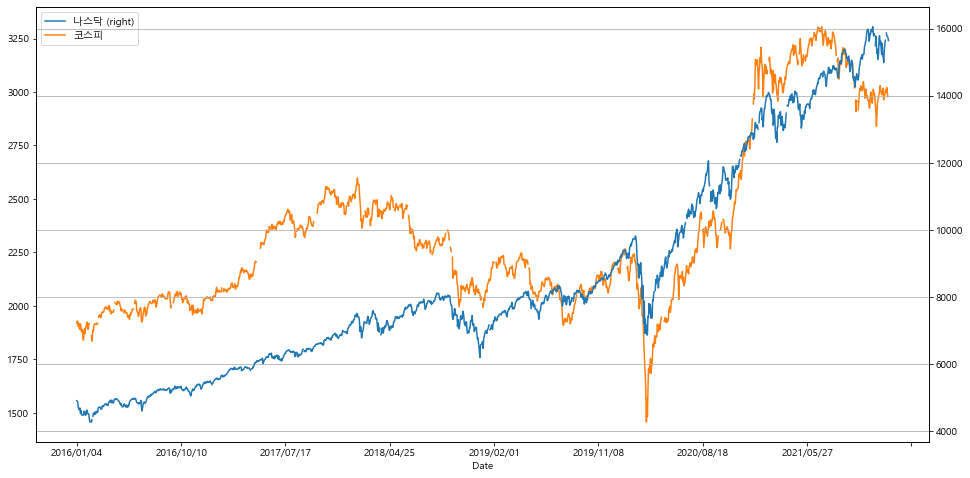

In [43]:
# 2016~2021 코스피/나스닥 일별 데이터 선 그래프

df[['나스닥', '코스피']].plot(secondary_y=['나스닥'])

<AxesSubplot:xlabel='Date'>

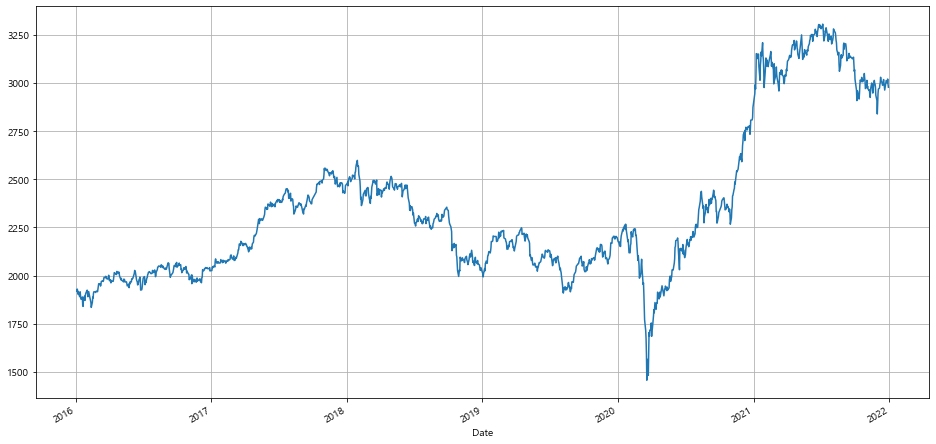

In [44]:
Nasdaq = pd.read_csv("C:/Users/acorn/Desktop/송정우강사/파이널프로젝트 1,4팀/data/2016_2021_나스닥.csv", encoding="euc-kr", thousands=",")
Nasdaq

ks11 = fdr.DataReader('KS11', '2016-01-04', '2021-12-31',data_source='close')
ks11['Close'].plot()

In [18]:
Nasdaq.head()

,Date,Close,Volume,Change
0,2016-01-04,677.79,502710.0,-0.0067
1,2016-01-05,684.07,741690.0,0.0093
2,2016-01-06,687.27,747610.0,0.0047
3,2016-01-07,679.66,692150.0,-0.0111
4,2016-01-08,682.56,710750.0,0.0043


In [45]:
Nasdaq['Date'] = pd.to_datetime(Nasdaq['Date'])
Nasdaq['Date']

0      2016-01-04
1      2016-01-05
2      2016-01-06
3      2016-01-07
4      2016-01-08
          ...    
1470   2021-12-24
1471   2021-12-27
1472   2021-12-28
1473   2021-12-29
1474   2021-12-30
Name: Date, Length: 1475, dtype: datetime64[ns]

In [46]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('M')
Nasdaq_month = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_month
# Nasdaq_month = [g for n, g in Nasdaq.set_index('Date').groupby(pd.Grouper(freq='m'))]
# Nasdaq_month
# coLname = ['columb name']
# Nasdaq_month = [g for n, g in Nasdaq.set_index('Date').groupby(pd.Grouper(freq='m'))]
# 리스트는 plot을 사용 할 수 없으니# 리스트를 데이터 프레임으로 변환한다d
# df_list = pd.DataFrame(Nasdaq_month)
# df_list.value_counts()

# plt.plot(df_list, marker = '*', color = 'r')
# plt.show()

,YearMonth,Close,Volume,Change
0,2016-01,678.811500,6.141055e+05,0.000080
1,2016-02,651.046667,5.388311e+05,-0.002344
2,2016-03,684.440000,5.988873e+05,0.002514
3,2016-04,697.671500,6.730035e+05,0.000835
4,2016-05,693.606000,7.273800e+05,-0.000065
...,...,...,...,...
67,2021-08,1029.975238,1.286834e+09,0.000424
68,2021-09,1035.891053,1.290956e+09,-0.001758
69,2021-10,980.638947,1.312632e+09,-0.000426
70,2021-11,1010.570909,1.209268e+09,-0.001173


In [47]:
Nasdaq_month.head()

,YearMonth,Close,Volume,Change
0,2016-01,678.811500,614105.500000,0.000080
1,2016-02,651.046667,538831.111111,-0.002344
2,2016-03,684.440000,598887.272727,0.002514
3,2016-04,697.671500,673003.500000,0.000835
4,2016-05,693.606000,727380.000000,-0.000065


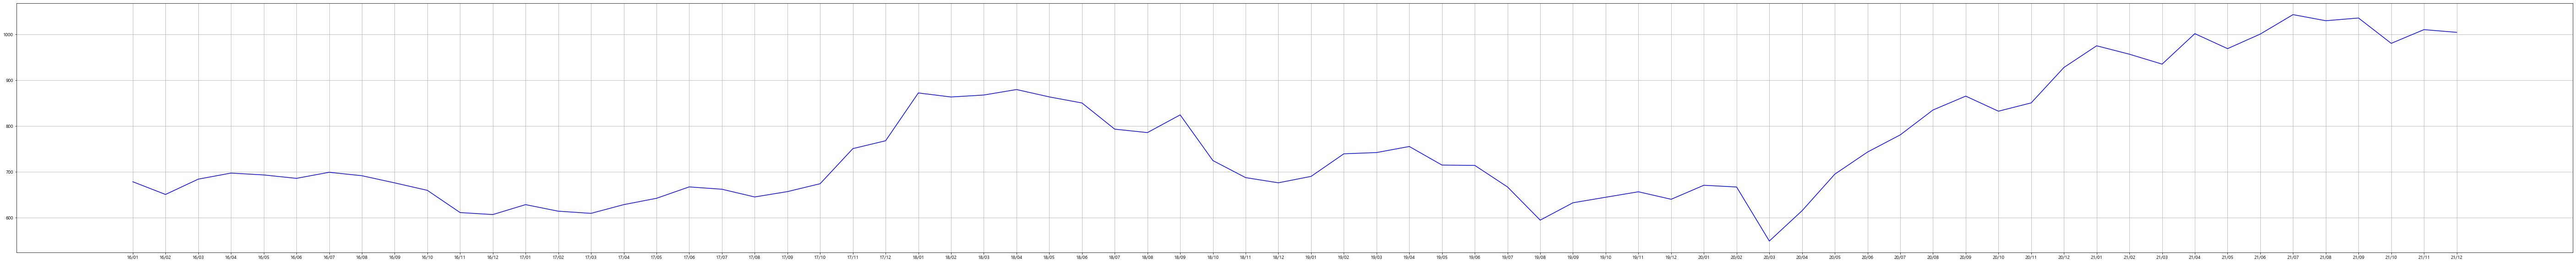

In [48]:
fig, axes = plt.subplots(1, 1, figsize=(100, 10))
axes.plot(Nasdaq_month['YearMonth'].dt.strftime('%y/%m'), Nasdaq_month['Close'], 'b')
# for i, title in enumerate(['Close']):
#     axes[i].set_title(title)
plt.show()

In [24]:
?plt

In [49]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('d')
Nasdaq_day = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_day

,YearMonth,Close,Volume,Change
0,2016-01-04,677.79,5.027100e+05,-0.0067
1,2016-01-05,684.07,7.416900e+05,0.0093
2,2016-01-06,687.27,7.476100e+05,0.0047
3,2016-01-07,679.66,6.921500e+05,-0.0111
4,2016-01-08,682.56,7.107500e+05,0.0043
...,...,...,...,...
1470,2021-12-24,1007.42,1.240000e+09,0.0041
1471,2021-12-27,1011.36,1.150000e+09,0.0039
1472,2021-12-28,1027.44,1.290000e+09,0.0159
1473,2021-12-29,1028.05,9.509400e+08,0.0006


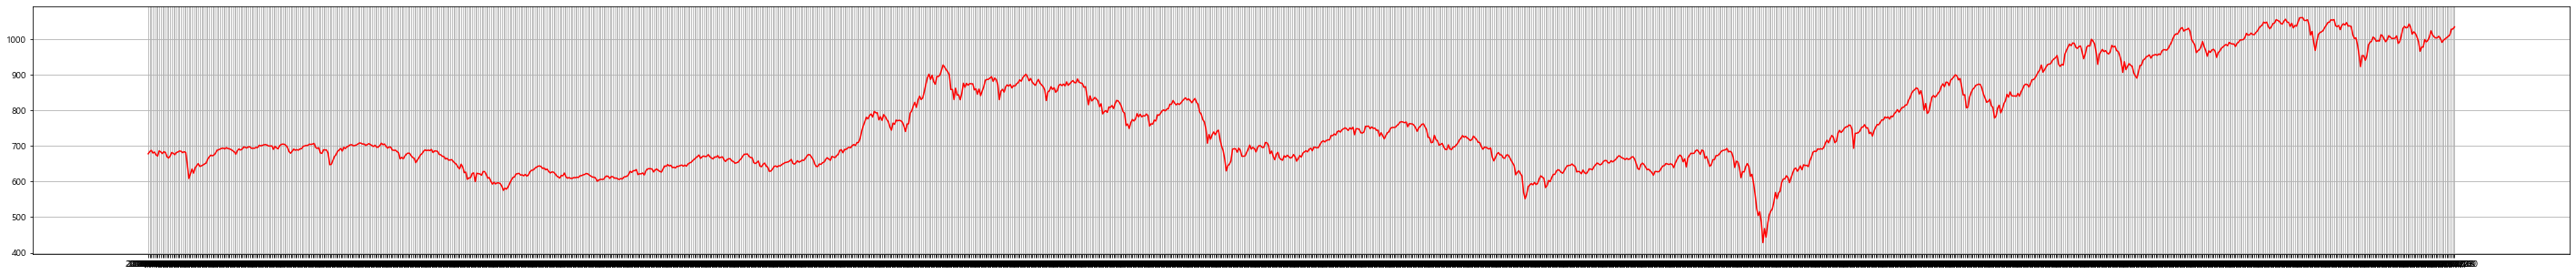

Object `plot` not found.


In [60]:
fig, axes = plt.subplots(1, 1, figsize=(50, 5))
axes.plot(Nasdaq_day['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_day['Close'], 'r')
plt.show()
?plot

In [52]:
## 연별로 출력 dt.to_period('Y')
## 나스닥

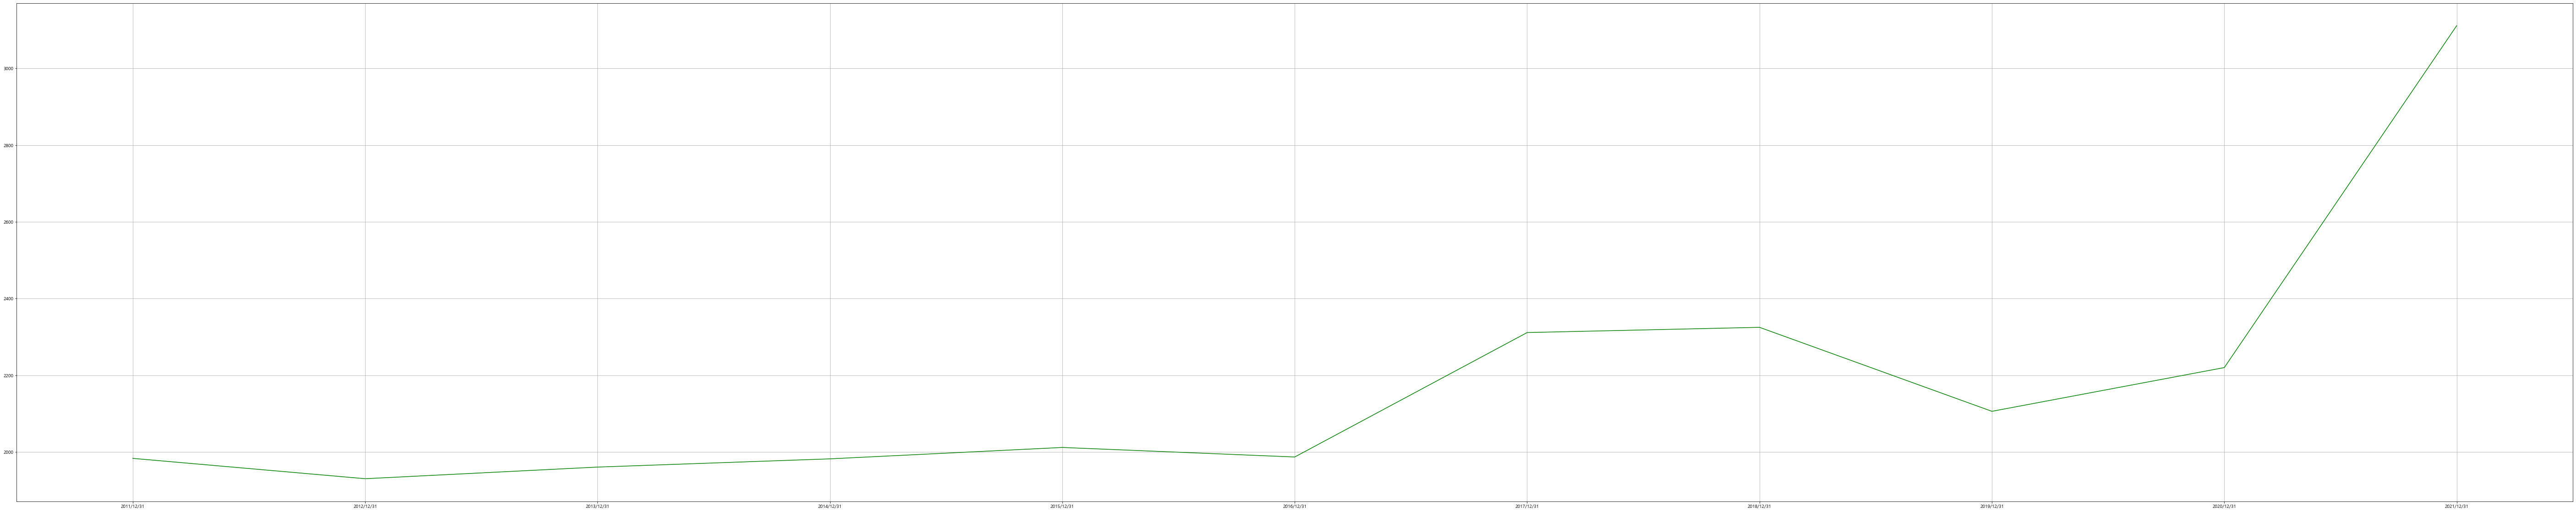

In [73]:
Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('Y')
Nasdaq_year = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_year

fig, axes = plt.subplots(1, 1, figsize=(100, 20))
axes.plot(Nasdaq_year['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_year['Close'], 'g')
plt.show()

In [106]:
# df = fdr.DataReader('KS11', '2011-01-01', '2021-12-31')
# df_kr = df.drop(['Low','High','Open'], axis=1)
# df_kr

# df_kr.to_csv("10년치 코스피.csv")

# df = fdr.DataReader('KQ11', '2011-01-01', '2021-12-31')
# df.drop(['Open'], axis=1)
# df.drop(['High'], axis=1)
# df_na = df.drop(['Low','High','Open'], axis=1)
# df_na

# df_na.to_csv("10년치 나스닥.csv")

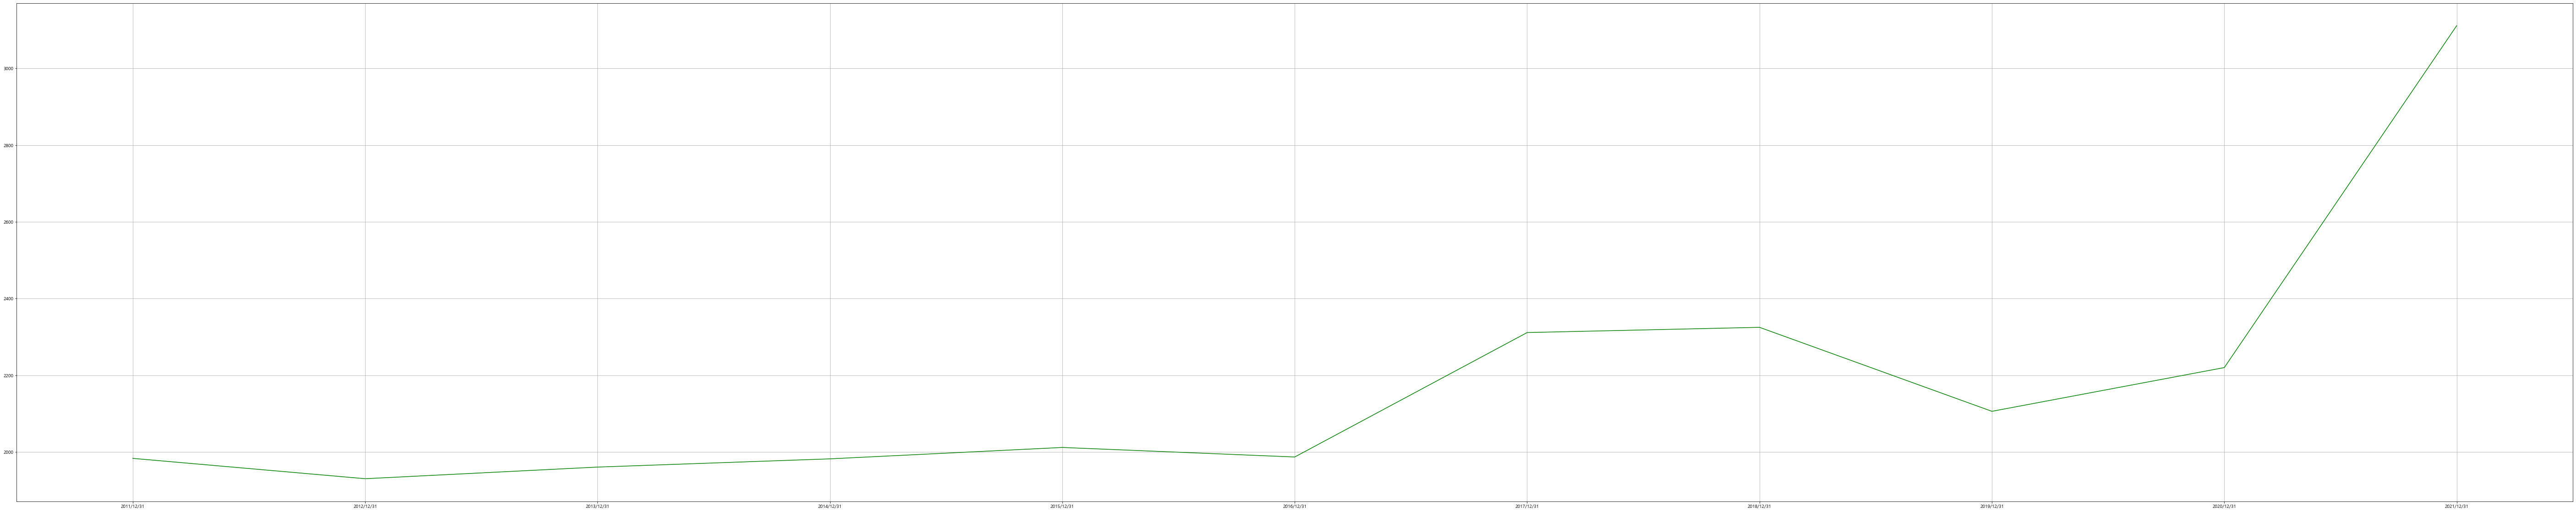

In [66]:
Nasdaq = pd.read_csv("C:/Users/acorn/Desktop/송정우강사/파이널프로젝트 1,4팀/data/10_코스피10년치.csv", encoding="euc-kr", thousands=",")
Nasdaq['Date'] = pd.to_datetime(Nasdaq['Date'])

Nasdaq['YearMonth'] = Nasdaq['Date'].dt.to_period('Y')
Nasdaq_year = Nasdaq.groupby('YearMonth').mean().reset_index()
Nasdaq_year

fig, axes = plt.subplots(1, 1, figsize=(100, 20))
axes.plot(Nasdaq_year['YearMonth'].dt.strftime('%Y/%m/%d'), Nasdaq_year['Close'], 'g')
plt.show()


In [74]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in kr_stock_ratio] 
df.head(10)

NameError: name 'kr_stock_ratio' is not defined

In [10]:
df_KOSPI = fdr.StockListing('KOSPI')

tiker_list= list(df_KOSPI.Symbol)
tiker_list

['095570',
 '006840',
 '152100',
 '295820',
 '253150',
 '253160',
 '395750',
 '395760',
 '278420',
 '429740',
 '292750',
 '309210',
 '333940',
 '333950',
 '333960',
 '333970',
 '333980',
 '269530',
 '433850',
 '433860',
 '433870',
 '433880',
 '421320',
 '251590',
 '161510',
 '251600',
 '289670',
 '298340',
 '189400',
 '419650',
 '415920',
 '278620',
 '429760',
 '269540',
 '287180',
 '213630',
 '332610',
 '426410',
 '332620',
 '195970',
 '238670',
 '195980',
 '373530',
 '256450',
 '239660',
 '280920',
 '266550',
 '301400',
 '301410',
 '227830',
 '122090',
 '328370',
 '301440',
 '376250',
 '027410',
 '282330',
 '138930',
 '001460',
 '001465',
 '001040',
 '079160',
 '00104K',
 '000120',
 '011150',
 '011155',
 '001045',
 '097950',
 '097955',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '000995',
 '139130',
 '001530',
 '000210',
 '001880',
 '000215',
 '375500',
 '37550L',
 '37550K',
 '007340',
 '004840',
 '155660',
 '069730',
 '017940',
 '365550',
 '383220',
 '007700',
 '285690',

In [ ]:
stock_list = [
  ["나스닥", "IXIC"],
  ["코스피", "ks11"],
]

In [ ]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]
len(df_list)

In [ ]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list]
df.head(10)

In [68]:
def stock_code(val):
    df_kospi = fdr.StockListing("KOSPI")
    name = df_kospi[df_kospi['Name']==val]
    symbol = name.iloc[0,0]
    return symbol

In [72]:
#종목이름 입력시 해당 종목의 주식코드번호 생성
stock_code('삼성전자')

'005930'

In [75]:
stock_list = [
  ["코스피", "KS11"],
  ["셀트리온", stock_code("셀트리온")],
]
print(stock_list)

[['코스피', 'KS11'], ['셀트리온', '068270']]


In [76]:
df_list = [fdr.DataReader(code, '2016-01-04', '2021-12-31')['Close'] for name, code in stock_list]

In [77]:
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,코스피,셀트리온
Date,,
2016-01-04,1918.76,76803
2016-01-05,1930.53,77750
2016-01-06,1925.43,78956
2016-01-07,1904.33,78956
2016-01-08,1917.62,83088
2016-01-11,1894.84,85413
2016-01-12,1890.86,84208
2016-01-13,1916.28,90495
2016-01-14,1900.01,89547


<AxesSubplot:xlabel='Date'>

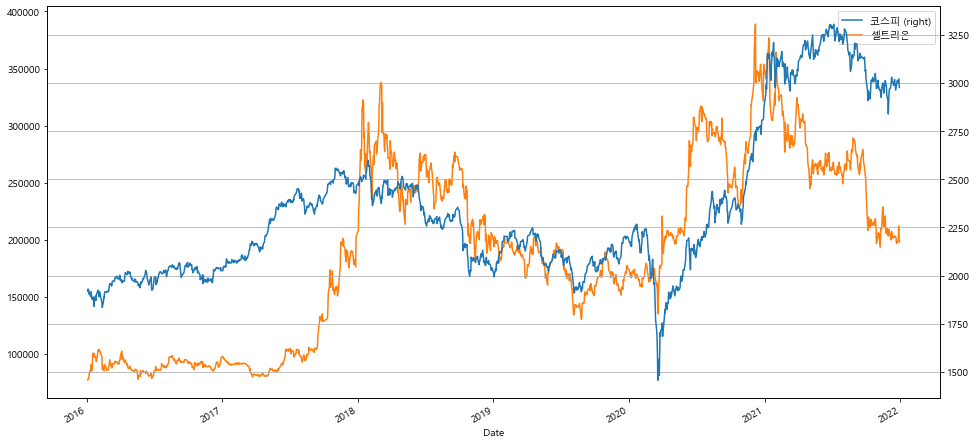

In [78]:
df[['코스피', '셀트리온']].plot(secondary_y=['코스피'])